## Test

In [1]:
from src.linear_causality import LinearLKInformationFlow
import numpy as np
from tqdm import tqdm
# from causality_subspace import causality_subspace

dt=1
pn=1
T1=[];T2=[]
# pca = PCA(n_components=5)  # 假设我们想将数据降到2维  
Nt=100000
np.random.seed = 5
# for i in tqdm(range(100)):
X1=np.random.randn(5,Nt)*0.2
X2=np.random.randn(5,Nt)*0.2

A1=np.array([[0.9,0.6,0,0.6,0],[0,0.8,0.6,0,0.6],[0,0,0.9,0,0],[0,0,0,0.2,0],[0,0,0,0,0.2]]).T
A2=np.array([[0.2,0.6,0,0.6,0],[0,0.2,0.6,0,0.6],[0,0,0.2,0,0],[0,0,0,0.2,0],[0,0,0,0,0.2]]).T

B1=-np.array([[0,0,0,0,0],[0,0.,0,0,0],[0,0,0,0.9,0.],[0,0,0,0.,0],[0,0,0,0,0]])
B2=-np.array([[0,0,0,0,0],[0,0.0,0,0,0],[0,0,0,0,0],[0,0,0,0.4,0],[0,0,0,0,0]])
for it in range(1,Nt):
    X1[:,it]=A1@X1[:,it-1]+X1[:,it]+1*B1@X2[:,it-1] 
    X2[:,it]=A2@X2[:,it-1]+X2[:,it]+1*B2@X1[:,it-1] 
    
XX=np.zeros([10,Nt])
XX[:5]=X1
XX[5:]=X2

In [2]:
# segments = [(2,3),(8,9)]
segments = [(0, 5),(5,10)]

In [3]:
lkif = LinearLKInformationFlow(np,1)
lkif.causality_estimate(XX[:,-15000:].T, lag_list=[1], segments=segments)

In [4]:
result_dict = lkif.get_dict()

In [5]:
np.abs(result_dict["information_flow"]) > result_dict["information_flow_std_origin"]*2.56

array([[ True, False],
       [ True,  True]])

In [6]:
np.abs(result_dict["information_flow"]) > result_dict["statistics"]["p99_critical_value"]

array([[ True, False],
       [ True,  True]])

In [7]:
np.abs(result_dict["information_flow"])

array([[1.99730619e+00, 2.54949389e-03],
       [2.43552494e-01, 4.01924686e+00]])

In [8]:
result_dict["information_flow_std_origin"]

array([[0.01250821, 0.00108012],
       [0.00348534, 0.01589917]])

In [9]:
result_dict["information_flow_std"]

array([[0.01250821, 0.00122235],
       [0.00519045, 0.01589917]])

---
---

## Prof. Liang's case
+ There is no information flow between X and Y in fact.
+ The original significance test, using a 90% confidence interval, will show a limited information flow.
+ The modified method, on the other hand, will correctly accept the null hypothesis ($H_0$).

In [10]:
## load data/X.dat and Y.dat
import pandas as pd
data_X = pd.read_csv('data/X.dat', header=None)
data_Y = pd.read_csv('data/Y.dat', header=None)

In [11]:
data_X = data_X.to_numpy()
data_Y = data_Y.to_numpy()

In [12]:
data = np.concatenate((data_X, data_Y), axis=1)

In [13]:
segments = [(0,1),(1,2)]

In [14]:
lkif = LinearLKInformationFlow(np,1)
lkif.causality_estimate(data, lag_list=[1], segments=segments)

In [15]:
result_dict = lkif.get_dict()

In [16]:
print('## 是否存在因果关系 (False 代表无信息流)\n')
print("### 使用原本的方差检验方法")
print("```")
print(np.abs(result_dict["information_flow"]) > result_dict["information_flow_std_origin"] * 1.65)
print("```")

print("### 使用新的方差检验方法")
print("```")
print(np.abs(result_dict["information_flow"]) > result_dict["information_flow_std"] * 1.65)
print("```")


## 是否存在因果关系 (False 代表无信息流)

### 使用原本的方差检验方法
```
[[ True False]
 [ True  True]]
```
### 使用新的方差检验方法
```
[[ True False]
 [False  True]]
```


---
---
## Bootstrap Method

In [1]:
## bootstrap
from src.linear_causality import LinearLKInformationFlow
import numpy as np

dt=1
pn=1
T1=[];T2=[]
# pca = PCA(n_components=5)  # 假设我们想将数据降到2维  
Nt=100000
np.random.seed = 5
# for i in tqdm(range(100)):
X1=np.random.randn(3,Nt)
X2=np.random.randn(3,Nt)

A1=np.array([[0.9,0.6,0,],[0,0.8,0.6,],[0,0,0.2]]).T
A2=np.array([[0.2,0.6,0,],[0,0.2,0.6,],[0,0,0.2]]).T

B1=-np.array([[0.1,-0.,0.3],[0,0.4,-0.5],[-0.1,0,0]])
B2=-np.array([[0,-0.1,0.],[0,-0.3,0.1],[0,0,0.1]])
for it in range(1,Nt):
    X1[:,it]=A1@X1[:,it-1]+X1[:,it]+1*B1@X2[:,it-1] 
    X2[:,it]=A2@X2[:,it-1]+X2[:,it]+1*B2@X1[:,it-1] 
    
XX=np.zeros([6,Nt])
XX[:3]=X1
XX[3:]=X2

In [38]:
sample_num = 50000
bootstrap_num = 1000

In [39]:
segments = [(0,1),(1,2),(2,3),(3,4),(4,5),(5,6)]
lkif = LinearLKInformationFlow(np,1)
lkif.causality_estimate(XX[:,-sample_num:].T, lag_list=[1], segments=segments)
result_dict = lkif.get_dict()

In [40]:
bootstrap_result = lkif.bootstrap_estimate(XX[:,-sample_num:].T, lag_list=[1], segments=segments, bootstrap_num=bootstrap_num, output_all=True)

Bootstrap Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

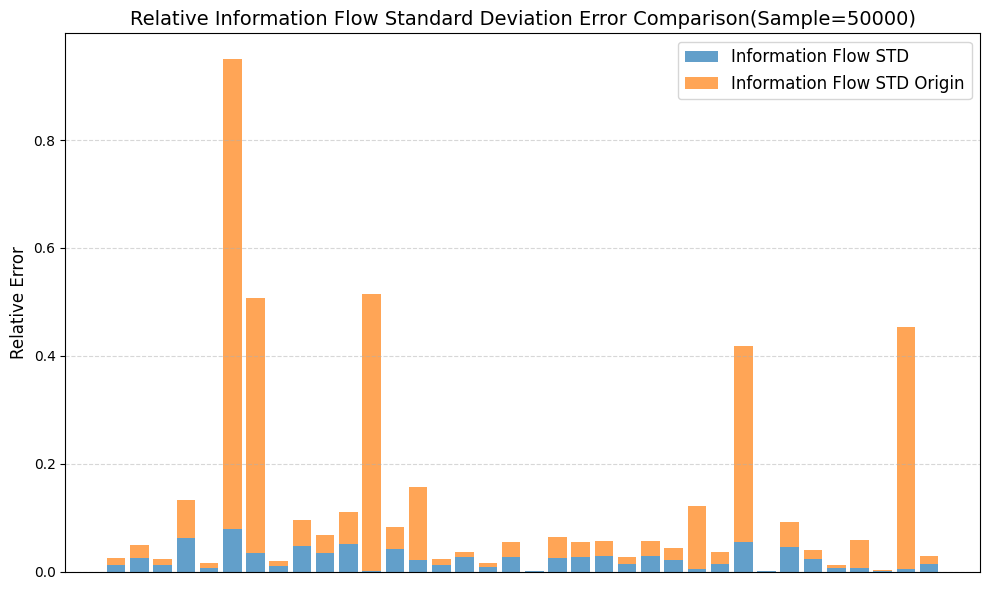

<Figure size 640x480 with 0 Axes>

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# 计算数据
y1 = (np.abs(result_dict["information_flow_std"].flatten() - bootstrap_result["bootstrap_information_flow_std"].flatten())) / bootstrap_result["bootstrap_information_flow_std"].flatten()
y2 = (np.abs(result_dict["information_flow_std_origin"].flatten() - bootstrap_result["bootstrap_information_flow_std"].flatten())) / bootstrap_result["bootstrap_information_flow_std"].flatten()

# 创建柱状堆积图
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(np.arange(len(y1)), y1, label='Information Flow STD', alpha=0.7)
ax.bar(np.arange(len(y2)), y2, bottom=y1, label='Information Flow STD Origin', alpha=0.7)

# 设置标题和标签
ax.set_title(f'Relative Information Flow Standard Deviation Error Comparison(Sample={sample_num})', fontsize=14)
ax.set_xlabel('')  # 去掉 x 轴标签
ax.set_ylabel('Relative Error', fontsize=12)

# 隐藏横坐标刻度
ax.set_xticks([])

# 添加图例,右上角图内
ax.legend(loc='upper right', fontsize=12,)

# 设置网格
ax.grid(True, linestyle='--', alpha=0.5)

# 显示图形
plt.tight_layout()
plt.show()
plt.savefig(f'figs/error_comparison_s_{sample_num}_b_{bootstrap_num}.eps', format='eps')

Unbiased estimate

In [33]:
bootstrap_result["bootstrap_information_flow_mean"]

array([[-0.12832422,  0.01399935,  0.01136139, -0.00511209, -0.01336155,
        -0.01650477],
       [ 0.20583094, -0.24138367,  0.01969356,  0.00650297, -0.11730812,
         0.04631638],
       [-0.01003833,  0.68851272, -0.81387321,  0.01078795, -0.01239429,
         0.00194442],
       [-0.00756553,  0.16229154, -0.0510635 , -0.838806  ,  0.03535098,
        -0.00310895],
       [ 0.01164947,  0.39734852, -0.12963396,  0.13580905, -0.7843468 ,
        -0.00271312],
       [ 0.00392862, -0.00292428, -0.09201869, -0.00107052,  0.29149792,
        -0.81271289]])

In [34]:
result_dict["information_flow"]

array([[-0.12852245,  0.0133648 ,  0.01108358, -0.00485752, -0.01329726,
        -0.01657079],
       [ 0.20588092, -0.24002432,  0.01925435,  0.00661388, -0.11756677,
         0.04640364],
       [-0.00978614,  0.68787179, -0.81213809,  0.01073709, -0.01227012,
         0.00192209],
       [-0.00738638,  0.16239898, -0.05090324, -0.83872536,  0.03460743,
        -0.00306284],
       [ 0.01205928,  0.39530631, -0.12752102,  0.13560926, -0.78593616,
        -0.00232538],
       [ 0.00359864, -0.0030155 , -0.0909675 , -0.001116  ,  0.29058509,
        -0.81277751]])

In [35]:
bootstrap_result["bootstrap_information_flow_mean"] - result_dict["information_flow"]

array([[ 1.98233224e-04,  6.34543610e-04,  2.77810802e-04,
        -2.54566668e-04, -6.42934954e-05,  6.60132810e-05],
       [-4.99753965e-05, -1.35934035e-03,  4.39213086e-04,
        -1.10904126e-04,  2.58643103e-04, -8.72580796e-05],
       [-2.52190851e-04,  6.40927833e-04, -1.73512515e-03,
         5.08537745e-05, -1.24165477e-04,  2.23304887e-05],
       [-1.79150903e-04, -1.07436960e-04, -1.60261156e-04,
        -8.06390046e-05,  7.43552022e-04, -4.61067525e-05],
       [-4.09815004e-04,  2.04220849e-03, -2.11293827e-03,
         1.99782071e-04,  1.58935883e-03, -3.87736142e-04],
       [ 3.29977730e-04,  9.12141035e-05, -1.05119570e-03,
         4.54820820e-05,  9.12826566e-04,  6.46165354e-05]])

Variance comparison

In [36]:
bootstrap_result["bootstrap_information_flow_std"]

array([[0.02640614, 0.02914071, 0.01938189, 0.00405082, 0.01025983,
        0.0097659 ],
       [0.01622845, 0.02509133, 0.01841911, 0.00429967, 0.01142224,
        0.00826414],
       [0.00736288, 0.03126077, 0.02951026, 0.00592898, 0.01332286,
        0.00465623],
       [0.00861379, 0.04148307, 0.03600023, 0.04361775, 0.02369933,
        0.00708896],
       [0.0116087 , 0.04645234, 0.03740141, 0.01979081, 0.03772264,
        0.01079977],
       [0.0048957 , 0.0213838 , 0.02450772, 0.00593159, 0.03706201,
        0.03146236]])

In [37]:
result_dict["information_flow_std_origin"]

array([[0.02736072, 0.02975152, 0.01930306, 0.00368965, 0.01094791,
        0.00193073],
       [0.00833094, 0.02464456, 0.0195548 , 0.00429731, 0.01008173,
        0.00319766],
       [0.00763842, 0.02763414, 0.02955916, 0.00602107, 0.01374037,
        0.00479347],
       [0.0083904 , 0.03489871, 0.0346014 , 0.04494377, 0.0222258 ,
        0.00726202],
       [0.01187947, 0.03906753, 0.03767788, 0.01060537, 0.037003  ,
        0.01027892],
       [0.00349597, 0.02067726, 0.02193398, 0.00578236, 0.01715248,
        0.03459498]])

In [38]:
result_dict["information_flow_std"]

array([[0.02736072, 0.02976201, 0.01933204, 0.00393326, 0.01105871,
        0.00902416],
       [0.01475222, 0.02464456, 0.0195615 , 0.00436287, 0.01177253,
        0.00789198],
       [0.00769536, 0.03314207, 0.02955916, 0.0061248 , 0.01375275,
        0.0048003 ],
       [0.00864249, 0.03949956, 0.03500819, 0.04494377, 0.02255498,
        0.00730916],
       [0.01196358, 0.04409117, 0.03816282, 0.01840685, 0.037003  ,
        0.01028227],
       [0.0039858 , 0.02068258, 0.02505725, 0.00579024, 0.03699587,
        0.03459498]])

In [39]:
rounded_information_flow = np.round(result_dict["information_flow"], 2) 

In [40]:
rounded_information_flow

array([[-0.13,  0.01,  0.01, -0.  , -0.01, -0.02],
       [ 0.21, -0.24,  0.02,  0.01, -0.12,  0.05],
       [-0.01,  0.69, -0.81,  0.01, -0.01,  0.  ],
       [-0.01,  0.16, -0.05, -0.84,  0.03, -0.  ],
       [ 0.01,  0.4 , -0.13,  0.14, -0.79, -0.  ],
       [ 0.  , -0.  , -0.09, -0.  ,  0.29, -0.81]])

In [41]:
A = np.concatenate([np.concatenate([A1,B1],axis=1),np.concatenate([B2,A2],axis=1)],axis=0)

In [42]:
A

array([[ 0.9,  0. ,  0. , -0.1,  0. , -0.3],
       [ 0.6,  0.8,  0. , -0. , -0.4,  0.5],
       [ 0. ,  0.6,  0.2,  0.1, -0. , -0. ],
       [-0. ,  0.1, -0. ,  0.2,  0. ,  0. ],
       [-0. ,  0.3, -0.1,  0.6,  0.2,  0. ],
       [-0. , -0. , -0.1,  0. ,  0.6,  0.2]])

In [43]:
np.round(lkif.invC_mul_dC, 2) .T

array([[-0.13,  0.66, -0.03, -0.03,  0.03,  0.03],
       [ 0.01, -0.24,  0.61,  0.13,  0.26, -0.  ],
       [ 0.02,  0.03, -0.81, -0.05, -0.1 , -0.12],
       [-0.05,  0.06,  0.07, -0.84,  0.54, -0.01],
       [-0.04, -0.42, -0.03,  0.06, -0.79,  0.59],
       [-0.31,  0.52,  0.01, -0.02, -0.01, -0.81]])

box plot

In [77]:
len(bootstrap_result["bootstrap_information_flow_list"])

1000

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 假设 bootstrap_result["information_flow_list"] 是一个包含5000个N x N矩阵的列表
bootstrap_samples = bootstrap_result["bootstrap_information_flow_list"]

# 理论矩阵
theoretical_std = result_dict["information_flow_std"]  # N x N 矩阵
theoretical_std_origin = result_dict["information_flow_std_origin"]  # N x N 矩阵
theoretical_mean = result_dict["information_flow"]  # N x N 矩阵

# 获取N的大小
N = theoretical_mean.shape[0]

# 用于存储每个位置的样本值和理论值
sample_values = []
theoretical_values = {'mean': {}, 'std': {}, 'std_origin': {}}
positions = []  # 存储每个位置的 [i, j]

# 遍历所有的样本矩阵
for sample in bootstrap_samples:
    for i in range(N):
        for j in range(N):
            sample_values.append(sample[i, j])  # 取出样本矩阵中的每个元素
            positions.append(N*i+j+1)
            theoretical_values['mean'][N*i+j+1] = theoretical_mean[i, j]
            theoretical_values['std'][N*i+j+1] = theoretical_std[i, j]

# 创建一个DataFrame来便于绘图
import pandas as pd

df = pd.DataFrame({
    'Position': positions, 
    'Value': sample_values,
    'Type': ['Sample Mean'] * len(sample_values)
})


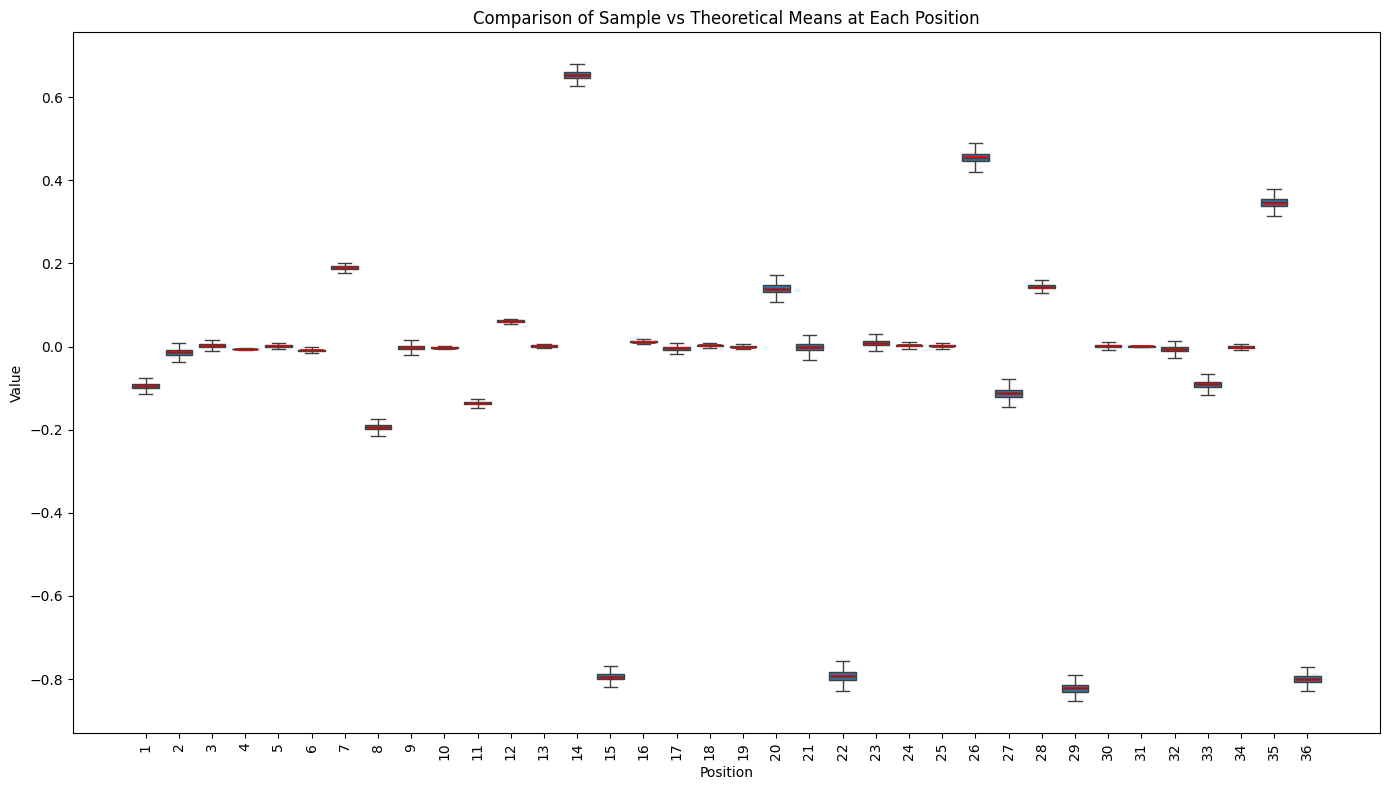

In [79]:
line_length = 0.35 
plt.figure(figsize=(14, 8))
sns.boxplot(x='Position', y='Value',  data=df, showfliers=False)
for position, mean_value in theoretical_values["mean"].items():
    plt.hlines(y=mean_value, xmin=position - line_length -1, xmax=position + line_length-1, colors='red', linewidth=2)  # 水平短横线
plt.title("Comparison of Sample vs Theoretical Means at Each Position")
plt.xticks(rotation=90)  # 使横坐标标签可读
plt.xlabel("Position")
plt.ylabel("Value")

# 显示图像
plt.tight_layout()
plt.show()

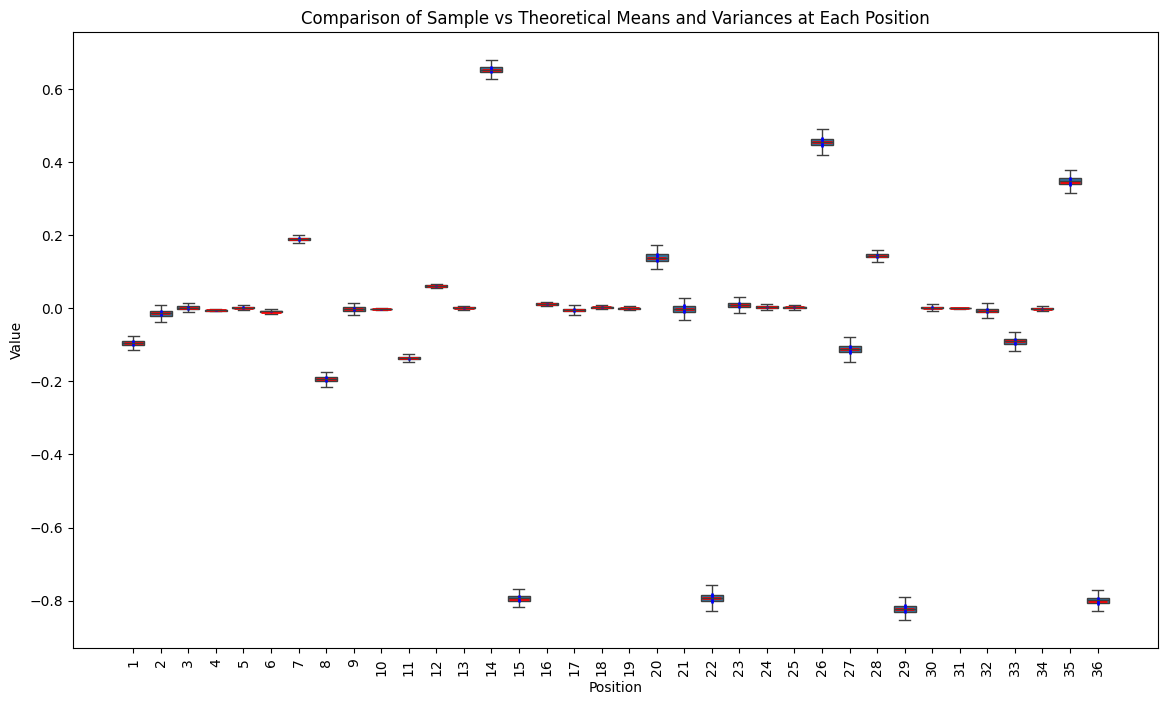

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

line_length = 0.35  
plt.figure(figsize=(14, 8))

# 画箱线图
sns.boxplot(x='Position', y='Value', data=df, showfliers=False)

# 遍历理论均值和方差
for position, mean_value in theoretical_values["mean"].items():
        std_value = theoretical_values["std"].get(position, 0)  # 获取标准差（如果不存在则默认为0）
        
        # 水平短横线表示均值
        plt.hlines(y=mean_value, xmin=position - line_length - 1, xmax=position + line_length - 1, colors='red', linewidth=2)
        # plt.fill_between(positions - 1, mean_value - std_value, mean_value + std_value, color='blue', alpha=0.2, label="Theoretical Variance")

        # # 垂直线表示均值 ± 标准差
        plt.vlines(x=position - 1, ymin=mean_value - std_value, ymax=mean_value + std_value, colors='blue', linewidth=2)

plt.title("Comparison of Sample vs Theoretical Means and Variances at Each Position")
plt.xticks(rotation=90)
plt.xlabel("Position")
plt.ylabel("Value")
plt.show()


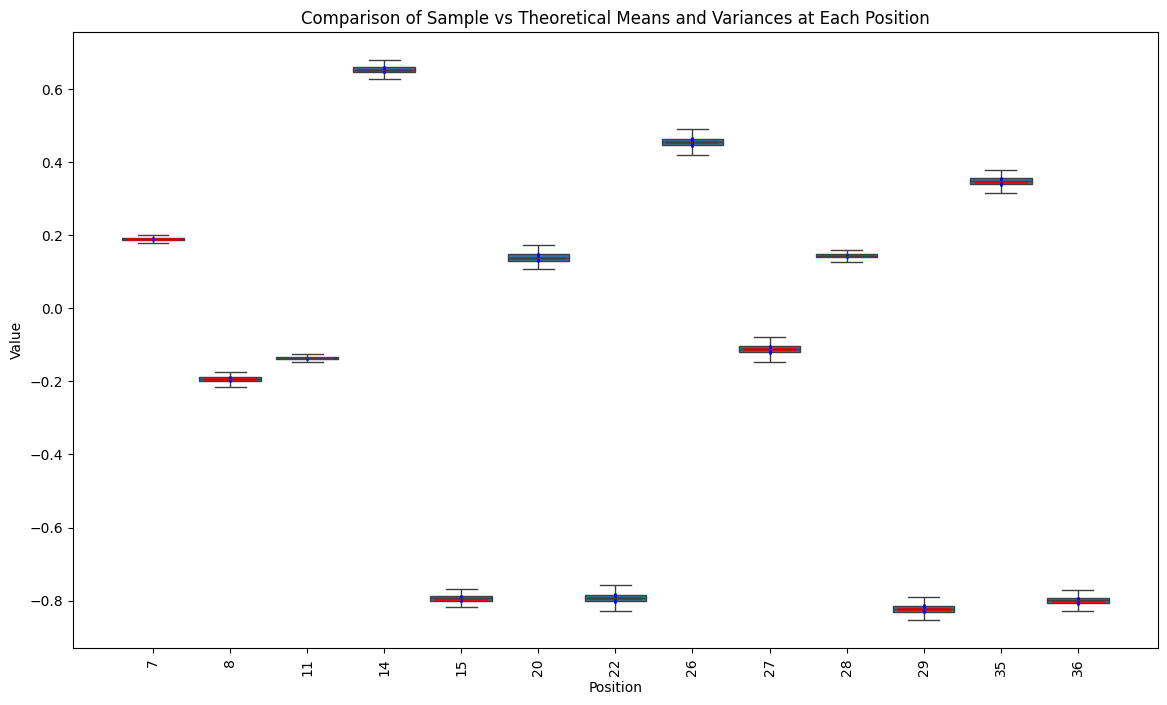

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

line_length = 0.35  
plt.figure(figsize=(14, 8))

# 先筛选符合 |mean_value| > 0.1 的 Position
valid_positions = {pos for pos, mean in theoretical_values["mean"].items() if np.abs(mean) > 0.1}

# 过滤 df
df_filtered = df[df["Position"].isin(valid_positions)]

# 画箱线图
ax = sns.boxplot(x='Position', y='Value', data=df_filtered, showfliers=False)

# 获取 Seaborn 处理后的 x 轴坐标
positions_map = {int(pos.get_text()): i for i, pos in enumerate(ax.get_xticklabels())}

# 遍历理论均值和方差
for position in valid_positions:
    if position not in positions_map:
        continue

    x_pos = positions_map[position]  # 获取类别映射的数值索引
    mean_value = theoretical_values["mean"][position]
    std_value = theoretical_values["std"].get(position, 0)

    # 水平短横线表示均值
    plt.hlines(y=mean_value, xmin=x_pos - line_length, xmax=x_pos + line_length, colors='red', linewidth=2)

    # 垂直线表示均值 ± 标准差
    plt.vlines(x=x_pos, ymin=mean_value - std_value, ymax=mean_value + std_value, colors='blue', linewidth=2)

plt.title("Comparison of Sample vs Theoretical Means and Variances at Each Position")
plt.xticks(rotation=90)
plt.xlabel("Position")
plt.ylabel("Value")
plt.show()


subspace

In [90]:
segments = [(0,2),(2,4),(4,6)]
lkif = LinearLKInformationFlow(np,1)
lkif.causality_estimate(XX[:,-5000:].T, lag_list=[1], segments=segments)
result_dict = lkif.get_dict()

In [91]:
bootstrap_result = lkif.bootstrap_estimate(XX[:,-5000:].T, lag_list=[1], segments=segments, bootstrap_num=1000, output_all=True)

Bootstrap Progress:   0%|          | 0/1000 [00:00<?, ?it/s]

Unbiased estimate

In [92]:
bootstrap_result["bootstrap_information_flow_mean"]

array([[-2.88919624e-01, -6.36043291e-04, -3.03053487e-02],
       [ 6.55224272e-01, -1.58836851e+00,  2.24953809e-03],
       [ 4.43892618e-01,  4.85652957e-03, -1.62221040e+00]])

In [93]:
result_dict["information_flow"]

array([[-2.89000591e-01, -4.30188764e-04, -3.06100717e-02],
       [ 6.55375193e-01, -1.58765112e+00,  2.11526621e-03],
       [ 4.44067052e-01,  4.84164397e-03, -1.62189981e+00]])

Variance comparison

In [94]:
bootstrap_result["bootstrap_information_flow_std"]

array([[0.01159728, 0.00801985, 0.00698425],
       [0.00924271, 0.01702584, 0.00534577],
       [0.01247316, 0.01317831, 0.01603697]])

In [95]:
result_dict["information_flow_std_origin"]

array([[0.01111914, 0.00779966, 0.00473899],
       [0.00760492, 0.0168962 , 0.00531614],
       [0.01042438, 0.01196283, 0.01582826]])

In [96]:
result_dict["information_flow_std"]

array([[0.01111914, 0.0078208 , 0.00697653],
       [0.00938919, 0.0168962 , 0.00532572],
       [0.0127745 , 0.01305228, 0.01582826]])

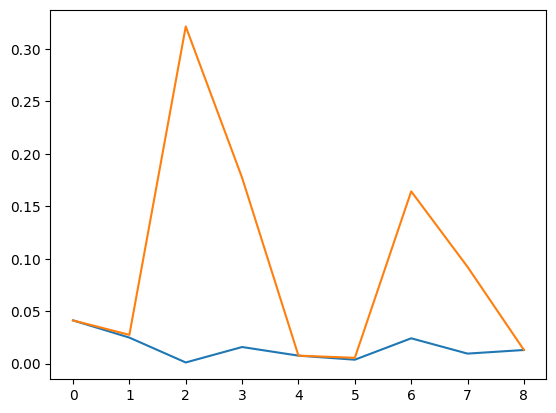

In [97]:
import matplotlib.pyplot as plt
plt.plot((np.abs(result_dict["information_flow_std"].flatten()-bootstrap_result["bootstrap_information_flow_std"].flatten()))/bootstrap_result["bootstrap_information_flow_std"].flatten())
plt.plot((np.abs(result_dict["information_flow_std_origin"].flatten()-bootstrap_result["bootstrap_information_flow_std"].flatten()))/bootstrap_result["bootstrap_information_flow_std"].flatten())
plt.show()

box plot

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 假设 bootstrap_result["information_flow_list"] 是一个包含5000个N x N矩阵的列表
bootstrap_samples = bootstrap_result["bootstrap_information_flow_list"]

# 理论矩阵
theoretical_std = result_dict["information_flow_std"]  # N x N 矩阵
theoretical_std_origin = result_dict["information_flow_std_origin"]  # N x N 矩阵
theoretical_mean = result_dict["information_flow"]  # N x N 矩阵

# 获取N的大小
N = theoretical_mean.shape[0]

# 用于存储每个位置的样本值和理论值
sample_values = []
theoretical_values = {'mean': {}, 'std': {}, 'std_origin': {}}
positions = []  # 存储每个位置的 [i, j]

# 遍历所有的样本矩阵
for sample in bootstrap_samples:
    for i in range(N):
        for j in range(N):
            sample_values.append(sample[i, j])  # 取出样本矩阵中的每个元素
            positions.append(N*i+j+1)
            theoretical_values['mean'][N*i+j+1] = theoretical_mean[i, j]
            theoretical_values['std'][N*i+j+1] = theoretical_std[i, j]

# 创建一个DataFrame来便于绘图
import pandas as pd

df = pd.DataFrame({
    'Position': positions, 
    'Value': sample_values,
    'Type': ['Sample Mean'] * len(sample_values)
})


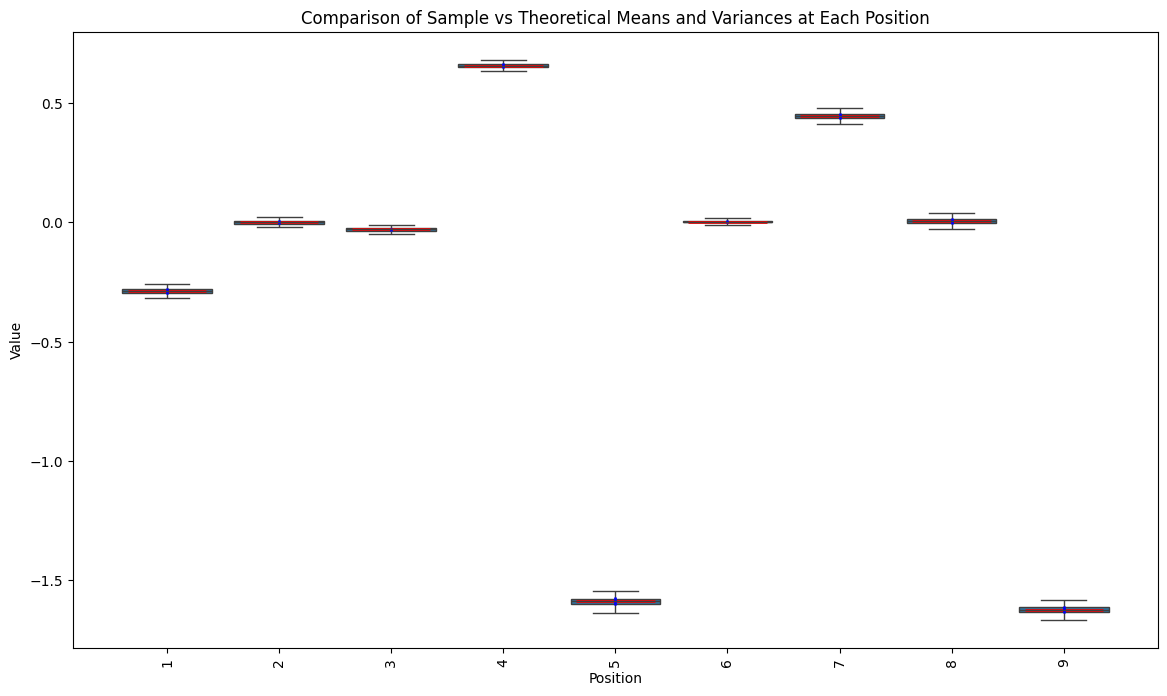

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

line_length = 0.35  
plt.figure(figsize=(14, 8))

# 画箱线图
sns.boxplot(x='Position', y='Value', data=df, showfliers=False)

# 遍历理论均值和方差
for position, mean_value in theoretical_values["mean"].items():
        std_value = theoretical_values["std"].get(position, 0)  # 获取标准差（如果不存在则默认为0）
        
        # 水平短横线表示均值
        plt.hlines(y=mean_value, xmin=position - line_length - 1, xmax=position + line_length - 1, colors='red', linewidth=2)
        # plt.fill_between(positions - 1, mean_value - std_value, mean_value + std_value, color='blue', alpha=0.2, label="Theoretical Variance")

        # # 垂直线表示均值 ± 标准差
        plt.vlines(x=position - 1, ymin=mean_value - std_value, ymax=mean_value + std_value, colors='blue', linewidth=2)

plt.title("Comparison of Sample vs Theoretical Means and Variances at Each Position")
plt.xticks(rotation=90)
plt.xlabel("Position")
plt.ylabel("Value")
plt.show()
